In [1]:
#Includes necesarios
from sklearn.naive_bayes import CategoricalNB

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.model_selection import train_test_split

from auxiliar import get_train_set,get_holdout_set,create_prediction
import preprocessing as pr

from auxiliar import plot_cm,plot_tree
from sklearn.metrics import classification_report,plot_roc_curve

# **Categorical Naive Bayes**

Obtenemos el dataset con el cual entrenaremos nuestro modelo. Para este modelo se opto unicamente tratar los missings como categoricos:

In [2]:
X,y = get_train_set()
X = pr.init_dataset(X)

### Preprocesamiento: ODE

Primero vamos a ver como funciona el modelo unicamente con las columnas categoricas.

In [3]:
X_category = pr.select_types(X,types=['category'])
X_category.head()

,barrio,categoria_de_trabajo,estado_marital,genero,religion,rol_familiar_registrado,trabajo
0,palermo,empleado_provincial,sin_matrimonio,hombre,cristianismo,sin_familia,entretenimiento
1,palermo,monotributista,matrimonio_civil,hombre,cristianismo,casado,directivo_gerente
2,palermo,relacion_de_dependencia,divorciado,hombre,cristianismo,sin_familia,limpiador
3,palermo,relacion_de_dependencia,matrimonio_civil,hombre,judaismo,casado,limpiador
4,balvanera,relacion_de_dependencia,matrimonio_civil,mujer,judaismo,casada,profesional_especializado


Luego debemos aplicar ODE a las columnas debido a que CategoricalNB funciona unicamente con valores numericos:

In [9]:
X_ode = pr.apply_ODE(X_category)

Partimos nuestro set en *train* y *validation*:

In [14]:
X_train, X_validation, y_train, y_validation = train_test_split(X_ode,y, test_size=0.2, stratify=y, random_state=0)

Busco los mejores hiperparametros para el arbol de decision con GridSearchCV. La metrica que se utiliza para comparar los modelos obtenidos en cada iteracion es *roc_auc_score*.

In [15]:
parameters = {
    'alpha': np.arange(0, 1,0.01),
}

clf = CategoricalNB()

gscv = GridSearchCV(
    clf, parameters, scoring='roc_auc',n_jobs=-1, cv=5, return_train_score=True
).fit(X_train, y_train)

print(f"Best score: {gscv.best_score_}")
print(f"Best params {gscv.best_params_}")
print("------------------")
print(f"Score in Validation: {gscv.score(X_validation, y_validation)}")

Best score: 0.8497994658915576
Best params {'alpha': 0.74}
------------------
Score in Validation: 0.8408609500423021


In [16]:
model_categoricalNB = gscv.best_estimator_
model_categoricalNB

CategoricalNB(alpha=0.74)

Predigo con el validation set:

In [17]:
categoricalNB_predict = model_categoricalNB.predict(X_validation)

**Metricas**

In [18]:
print(classification_report(y_validation, categoricalNB_predict))

              precision    recall  f1-score   support

           0       0.91      0.75      0.82      4945
           1       0.49      0.76      0.60      1568

    accuracy                           0.75      6513
   macro avg       0.70      0.75      0.71      6513
weighted avg       0.81      0.75      0.77      6513



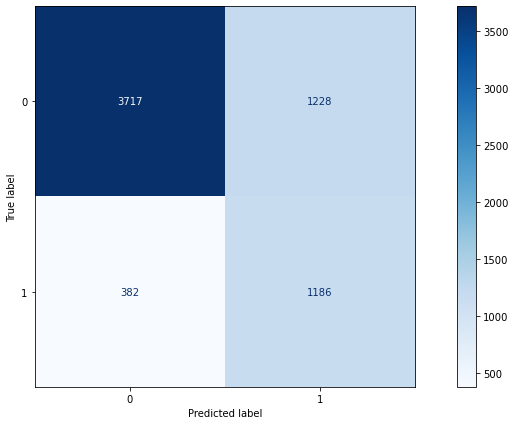

In [19]:
plot_cm(model_categoricalNB, X_validation, y_validation)

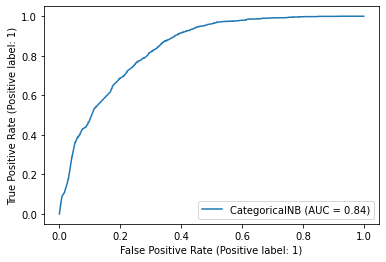

In [20]:
plot_roc_curve(model_categoricalNB, X_validation, y_validation, response_method="predict_proba")
plt.show()

### Preprocesamiento: Reduccion de columnas + ODE

Ahora vemos que sucede si reduciremos algunas columnas y luego aplicaremos ODE a las columnas categoricas. Al realizar esta primera reduccion de columnas obtendremos asi una reduccion dimensional. Reduciremos mediante la funcion **reduce_by_frequency_occurrence** que por predeterminado tiene las columnas *Barrio, Religion, Categoria de Trabajo, Estado Marital*:

In [21]:
X_p1 = pr.reduce_by_frequency_occurrence(X_category)
X_p1.head()

,barrio,categoria_de_trabajo,estado_marital,genero,religion,rol_familiar_registrado,trabajo
0,palermo,otra,sin_matrimonio,hombre,cristianismo,sin_familia,entretenimiento
1,palermo,otra,matrimonio_civil,hombre,cristianismo,casado,directivo_gerente
2,palermo,relacion_de_dependencia,otro,hombre,cristianismo,sin_familia,limpiador
3,palermo,relacion_de_dependencia,matrimonio_civil,hombre,judaismo,casado,limpiador
4,otro,relacion_de_dependencia,matrimonio_civil,mujer,judaismo,casada,profesional_especializado


Luego debemos aplicar ODE como se menciono anteriormente:

In [22]:
X_ode_p1 = pr.apply_ODE(X_p1)

Partimos nuestro set en *train* y *validation*:

In [23]:
X_train, X_validation, y_train, y_validation = train_test_split(X_ode_p1,y, test_size=0.2, stratify=y, random_state=0)

Busco los mejores hiperparametros para el arbol de decision con GridSearchCV. La metrica que se utiliza para comparar los modelos obtenidos en cada iteracion es *roc_auc_score*.

In [24]:
parameters = {
    'alpha': np.arange(0, 1,0.01),
}

clf = CategoricalNB()

gscv = GridSearchCV(
    clf, parameters, scoring='roc_auc',n_jobs=-1, cv=5, return_train_score=True
).fit(X_train, y_train)

print(f"Best score: {gscv.best_score_}")
print(f"Best params {gscv.best_params_}")
print("------------------")
print(f"Score in Validation: {gscv.score(X_validation, y_validation)}")

Best score: 0.8470946390441394
Best params {'alpha': 0.35000000000000003}
------------------
Score in Validation: 0.8387822166278038


In [25]:
model_categoricalNB_p1 = gscv.best_estimator_
model_categoricalNB_p1

CategoricalNB(alpha=0.35000000000000003)

Predigo con el validation set:

In [26]:
categoricalNB_predict = model_categoricalNB_p1.predict(X_validation)

**Metricas**

In [27]:
print(classification_report(y_validation, categoricalNB_predict))

              precision    recall  f1-score   support

           0       0.91      0.74      0.81      4945
           1       0.48      0.76      0.59      1568

    accuracy                           0.74      6513
   macro avg       0.69      0.75      0.70      6513
weighted avg       0.80      0.74      0.76      6513



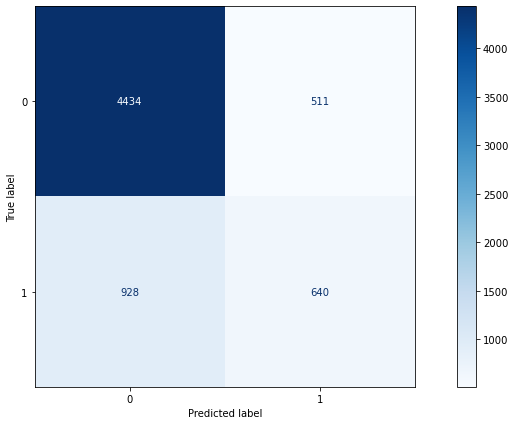

In [28]:
plot_cm(model_categoricalNB, X_validation, y_validation)

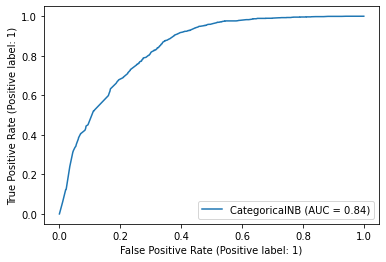

In [29]:
plot_roc_curve(model_categoricalNB_p1, X_validation, y_validation, response_method="predict_proba")
plt.show()

### Preprocesamiento: Discretizacion de columnas + ODE

Ahora veremos que sucede si en vez de quedarnos solo con las columnas categoricas, discretizamos las columnas numericas y luego aplicaremos ODE. Al realizar esta primera discretizacion de columnas tendremos todo el dataset con columnas cateogricas. Discretizaremos mediante la funcion **discretize_columns** que por predeterminado tiene las columnas *Años Estudiados, Edad, Horas de Trabajo, Ganancia/Perdida Bolsa Argentina*:

In [30]:
X_p2 = pr.discretize_columns(X)
X_p2.head()

,barrio,categoria_de_trabajo,estado_marital,genero,religion,rol_familiar_registrado,trabajo,anios_estudiados_bins,edad_bins,horas_trabajo_registradas_bins,ganancia_perdida_declarada_bolsa_argentina_bins
0,palermo,empleado_provincial,sin_matrimonio,hombre,cristianismo,sin_familia,entretenimiento,4,1,1,0
1,palermo,monotributista,matrimonio_civil,hombre,cristianismo,casado,directivo_gerente,4,2,0,0
2,palermo,relacion_de_dependencia,divorciado,hombre,cristianismo,sin_familia,limpiador,3,1,1,0
3,palermo,relacion_de_dependencia,matrimonio_civil,hombre,judaismo,casado,limpiador,2,3,1,0
4,balvanera,relacion_de_dependencia,matrimonio_civil,mujer,judaismo,casada,profesional_especializado,4,0,1,0


Luego debemos aplicar ODE como se menciono anteriormente:

In [31]:
X_ode_p2 = pr.apply_ODE(X_p2)

Partimos nuestro set en *train* y *validation*:

In [33]:
X_train, X_validation, y_train, y_validation = train_test_split(X_ode_p2,y, test_size=0.2, stratify=y, random_state=0)

Busco los mejores hiperparametros para el arbol de decision con GridSearchCV. La metrica que se utiliza para comparar los modelos obtenidos en cada iteracion es *roc_auc_score*.

In [34]:
parameters = {
    'alpha': np.arange(0, 1,0.01),
}

clf = CategoricalNB()

gscv = GridSearchCV(
    clf, parameters, scoring='roc_auc',n_jobs=-1, cv=5, return_train_score=True
).fit(X_train, y_train)

print(f"Best score: {gscv.best_score_}")
print(f"Best params {gscv.best_params_}")
print("------------------")
print(f"Score in Validation: {gscv.score(X_validation, y_validation)}")

Best score: 0.8934156599185314
Best params {'alpha': 0.1}
------------------
Score in Validation: 0.8849950862549266


In [35]:
model_categoricalNB_p2 = gscv.best_estimator_
model_categoricalNB_p2

CategoricalNB(alpha=0.1)

Predigo con el validation set:

In [36]:
categoricalNB_predict = model_categoricalNB_p2.predict(X_validation)

**Metricas**

In [37]:
print(classification_report(y_validation, categoricalNB_predict))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86      4945
           1       0.56      0.77      0.65      1568

    accuracy                           0.80      6513
   macro avg       0.74      0.79      0.76      6513
weighted avg       0.83      0.80      0.81      6513



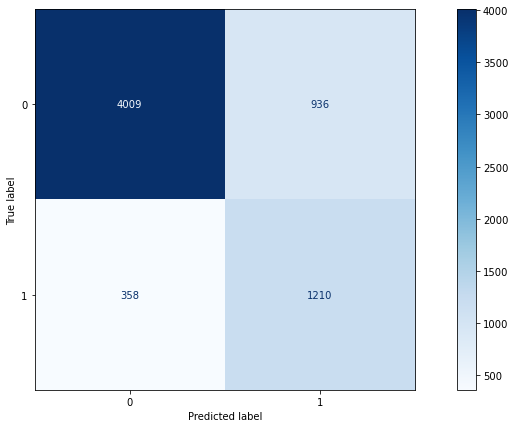

In [38]:
plot_cm(model_categoricalNB_p2, X_validation, y_validation)

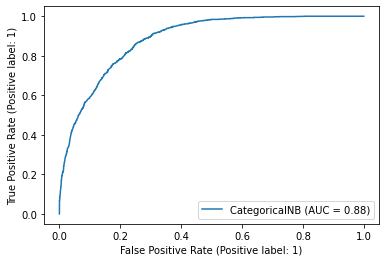

In [39]:
plot_roc_curve(model_categoricalNB_p2, X_validation, y_validation, response_method="predict_proba")
plt.show()

# Conclusión

Vimos que utilizando CategoricalNB tenemos una mal performance de la metrica *roc_auc* en comparación con los demas modelos. Aplicando una reducción de las columnas cateogricas nos aporto una mejora pero tan relevante. Luego vimos que discretizando las columnas numericas, convirtiendolas en cateogricas, obtenemos una ganancia en la metrica *roc_auc* debido a que contamos con mas informacion que sin haber aplicado este preproceso.

# Predicción

In [49]:
ids, X_holdout = get_holdout_set()
X_holdout = pr.init_dataset(X_holdout)

In [50]:
X_holdout_p2 = pr.discretize_columns(X_holdout)
X_holdout_ode = pr.apply_ODE(X_holdout_p2)

In [56]:
categoricalNB_predict = model_categoricalNB_p2.predict(X_holdout_ode)

In [57]:
create_prediction(ids,categoricalNB_predict,file_name='categoricalNB')

# Referencias

https://www.baeldung.com/cs/naive-bayes-classification-performance